In [12]:
%matplotlib inline
import numpy as np
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.stats import binned_statistic
import os

In [13]:
def sort_nums(filename):
    return int(filename.split('_')[-1].split('.')[0])

In [14]:
emissivity_warped_5_10_15 = "/Users/willsurgent/Desktop/test/emissivity_warped_5_10_15"
emissivity_warped_5_10_30 = "/Users/willsurgent/Desktop/test/emissivity_warped_5_10_30"
emissivity_warped_5_10_45 = "/Users/willsurgent/Desktop/test/emissivity_warped_5_10_45"

emissivity_warped_10_10_15 = "/Users/willsurgent/Desktop/test/emissivity_warped_10_10_15"
emissivity_warped_10_10_30 = "/Users/willsurgent/Desktop/test/emissivity_warped_10_10_30"
emissivity_warped_10_10_45 = "/Users/willsurgent/Desktop/test/emissivity_warped_10_10_45"

In [15]:
# image_filename = 'emissivity2d.fits'

In [16]:
def get_files(path):
    directory_path = os.path.join(os.path.expanduser("~"), path)
    unsorted_files = [os.path.join(directory_path, name) for name in os.listdir(directory_path)]
    filtered_files = [file for file in unsorted_files if not os.path.basename(file).startswith("._")]
    return sorted(filtered_files, key=sort_nums)

In [17]:
emissivity_warped_5_10_15_files = get_files(emissivity_warped_5_10_15)
emissivity_warped_5_10_30_files = get_files(emissivity_warped_5_10_30)
emissivity_warped_5_10_45_files = get_files(emissivity_warped_5_10_45)

emissivity_warped_10_10_15_files = get_files(emissivity_warped_10_10_15)
emissivity_warped_10_10_30_files = get_files(emissivity_warped_10_10_30)
emissivity_warped_10_10_45_files = get_files(emissivity_warped_10_10_45)

In [18]:
def get_info(files):
    data = []
    for i in range(len(files)):
        data.append(np.genfromtxt(files[i]))
        
    data = np.array(data)
    emissivity = np.sum(data[:, :, 5], axis=0)
    radius = data[:, :, 0]
    phi = data[:, :, 1]
    
    radius = radius[0].reshape(50,50)
    phi = phi[0].reshape(50,50) 
    emissivity = emissivity.reshape(50, 50)
    
    return radius, phi, emissivity

In [19]:
radius_warped_5_10_15, phi_warped_5_10_15, emissivity_warped_5_10_15 = get_info(emissivity_warped_5_10_15_files)
radius_warped_5_10_30, phi_warped_5_10_30, emissivity_warped_5_10_30 = get_info(emissivity_warped_5_10_30_files)
radius_warped_5_10_45, phi_warped_5_10_45, emissivity_warped_5_10_45 = get_info(emissivity_warped_5_10_45_files)

radius_warped_10_10_15, phi_warped_10_10_15, emissivity_warped_10_10_15 = get_info(emissivity_warped_10_10_15_files)
radius_warped_10_10_30, phi_warped_10_10_30, emissivity_warped_10_10_30 = get_info(emissivity_warped_10_10_30_files)
radius_warped_10_10_45, phi_warped_10_10_45, emissivity_warped_10_10_45 = get_info(emissivity_warped_10_10_45_files)

In [ ]:
# data = []
# for i in range(len(organized_files)):
#     data.append(np.loadtxt(organized_files[i]))

In [ ]:
# data = np.array(data)
# emissivity = np.sum(data[:, :, 5], axis=0)

In [ ]:
# radius = data[:, :, 0]
# phi = data[:, :, 1]

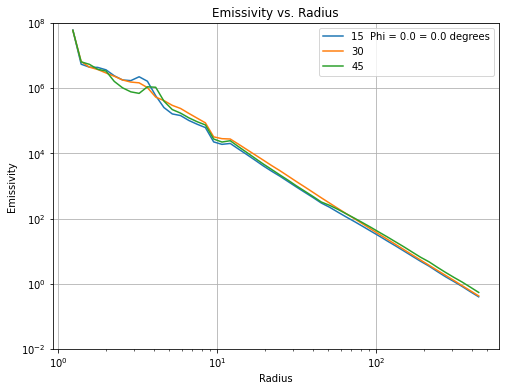

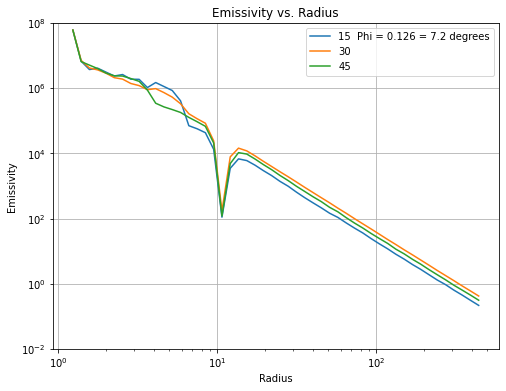

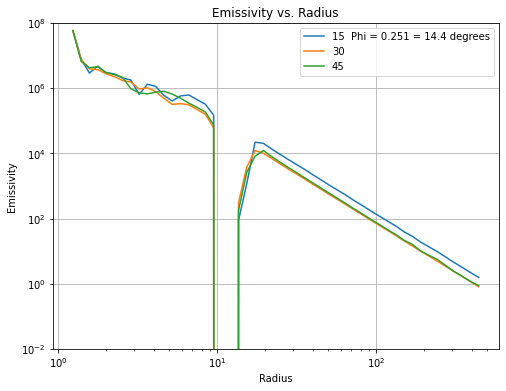

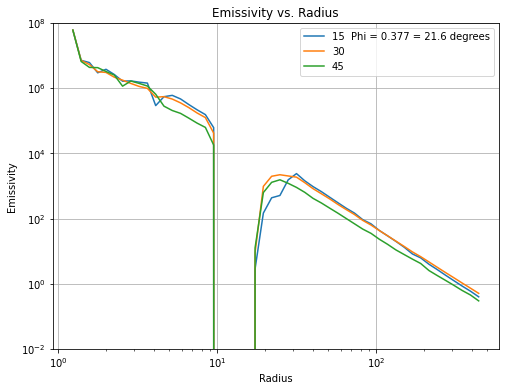

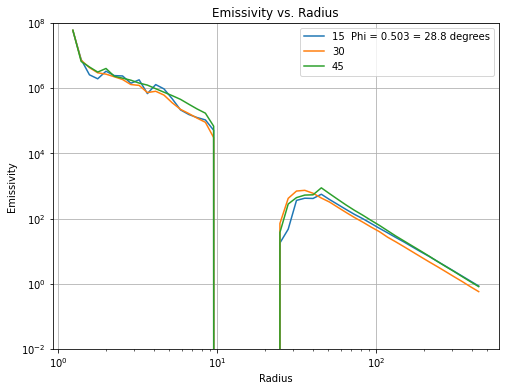

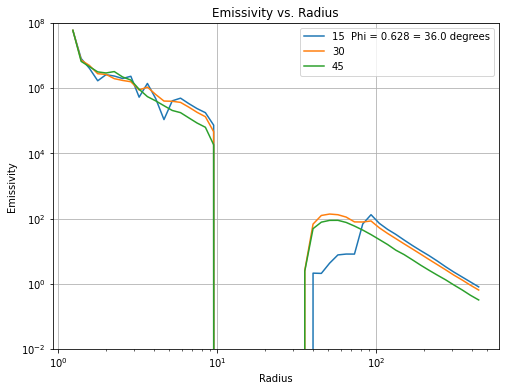

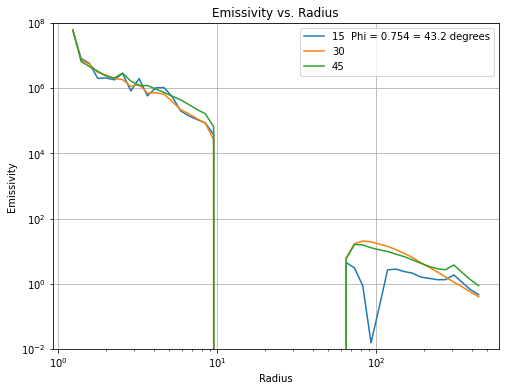

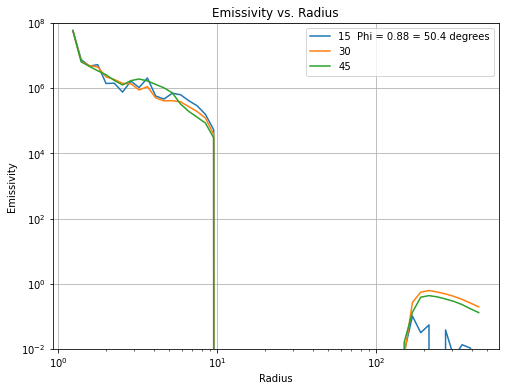

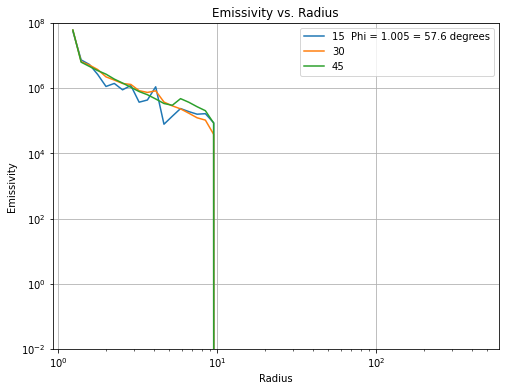

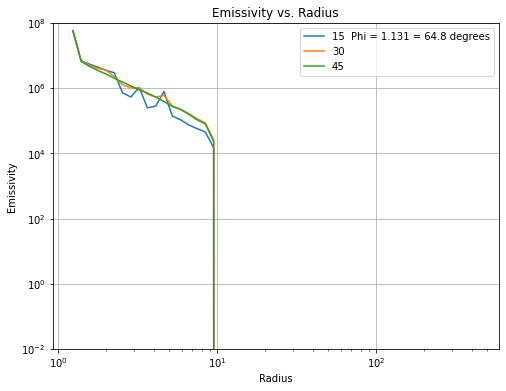

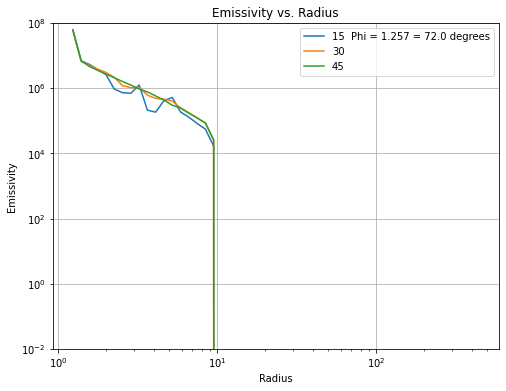

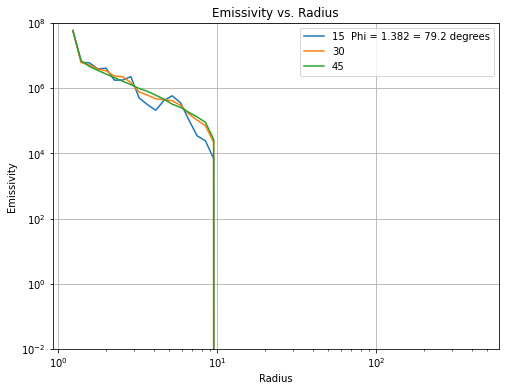

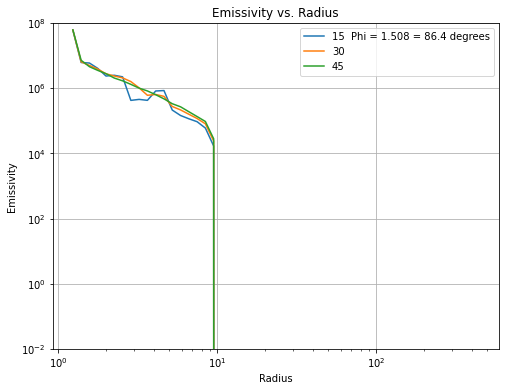

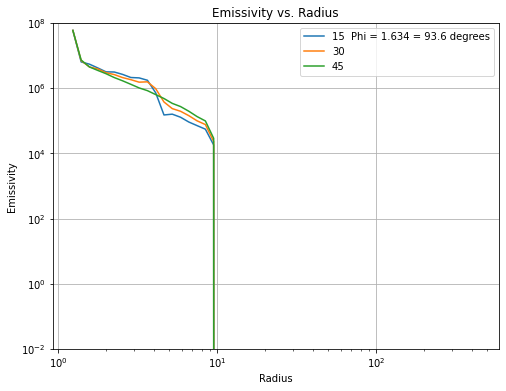

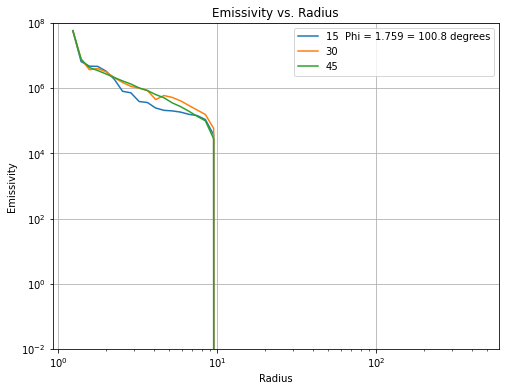

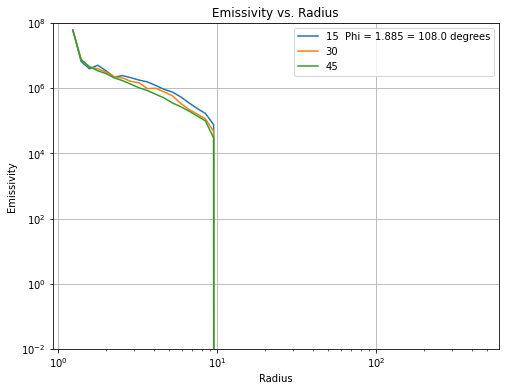

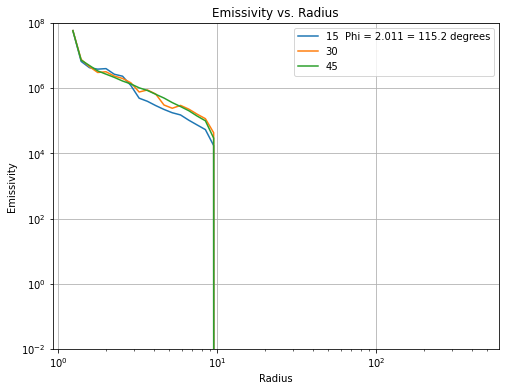

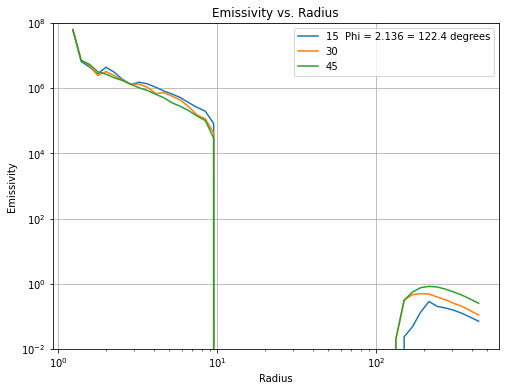

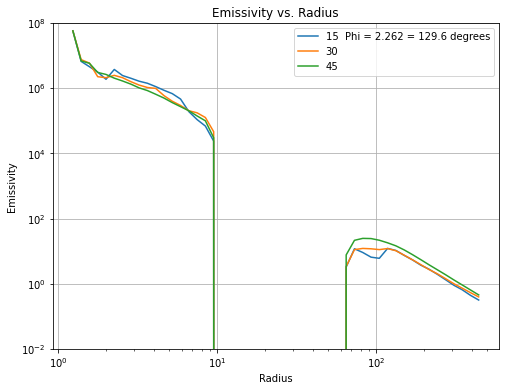

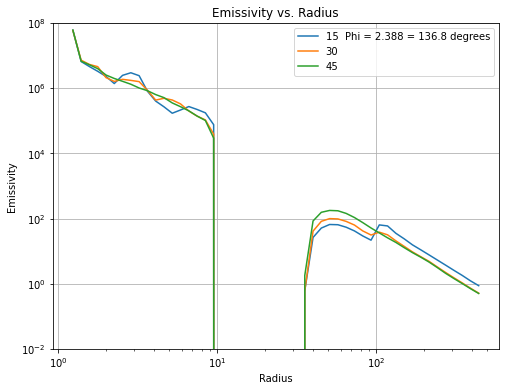

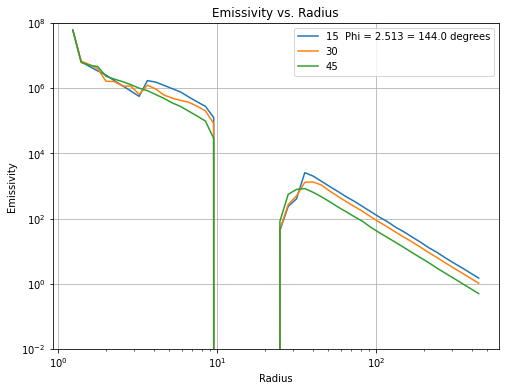

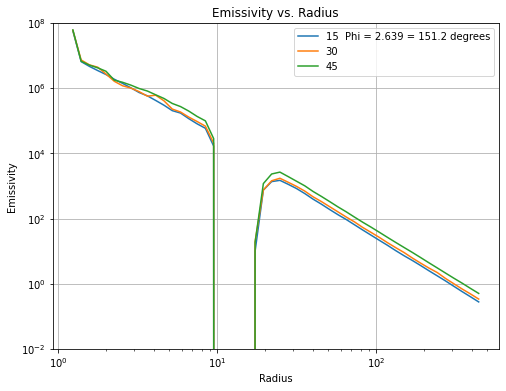

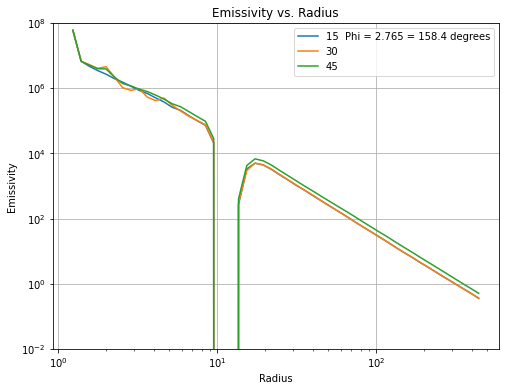

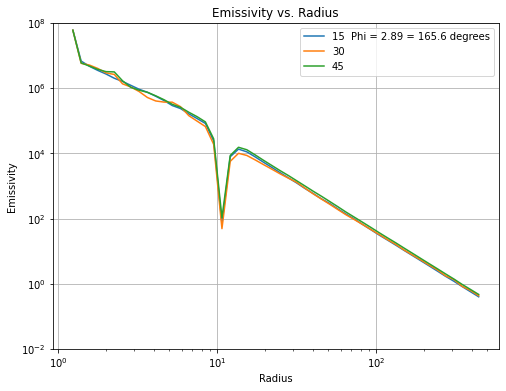

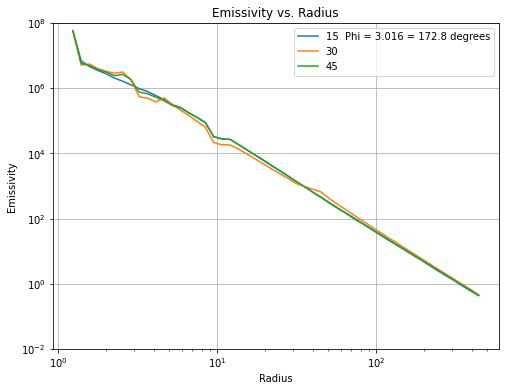

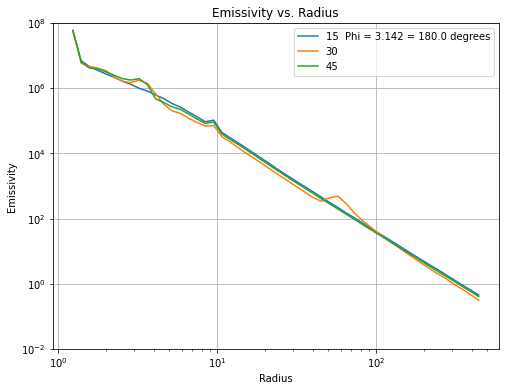

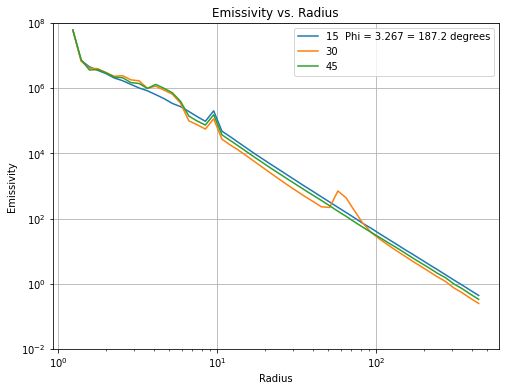

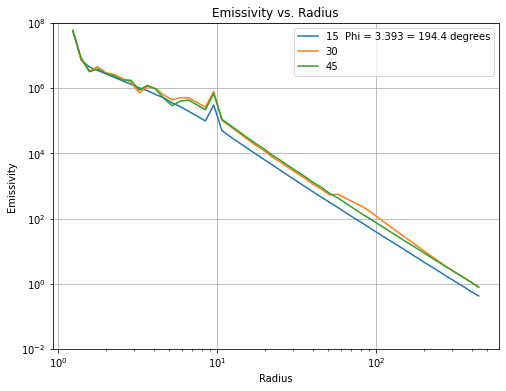

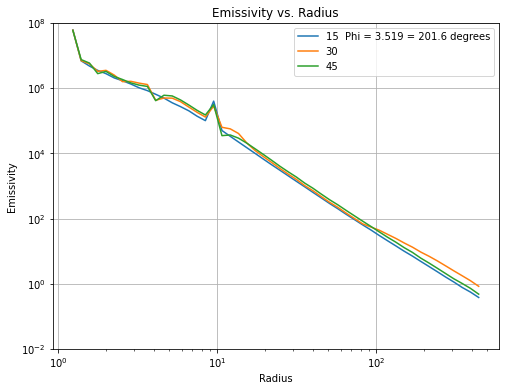

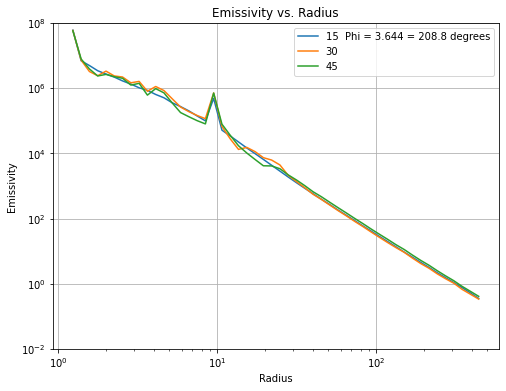

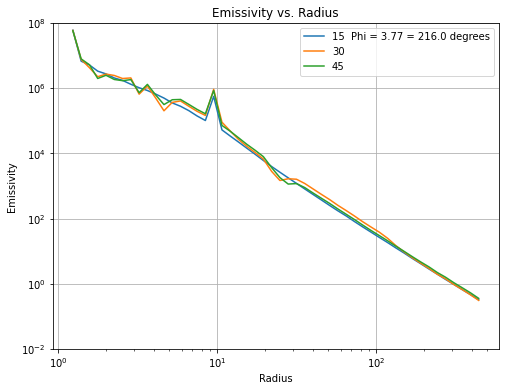

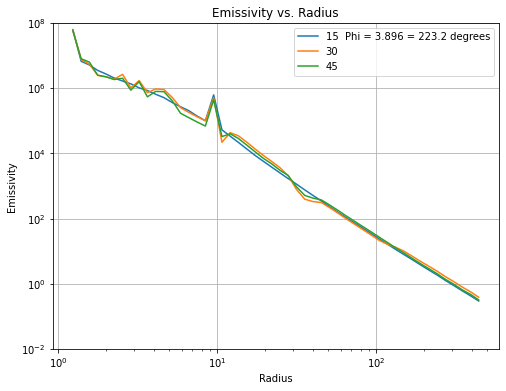

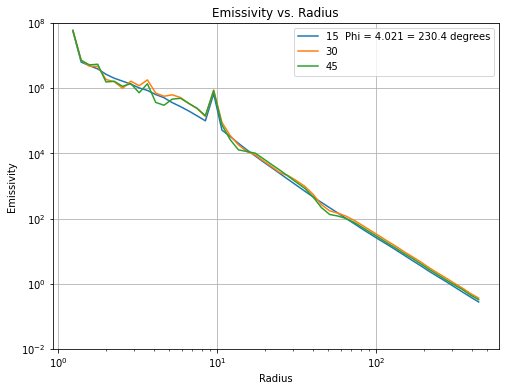

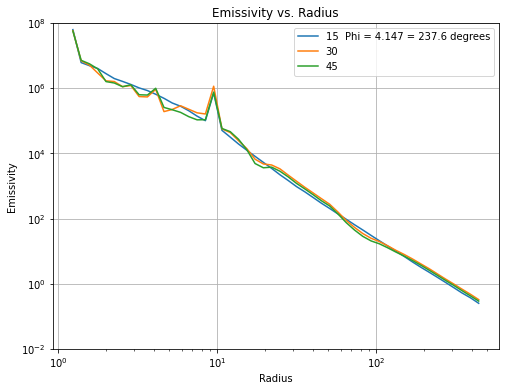

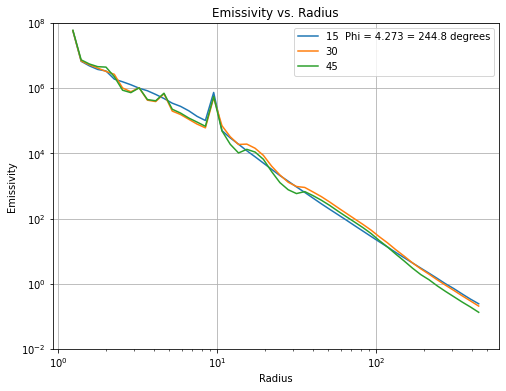

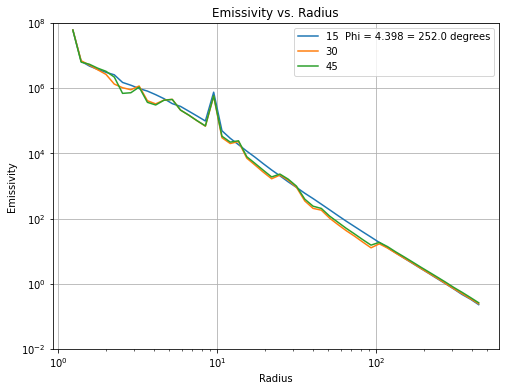

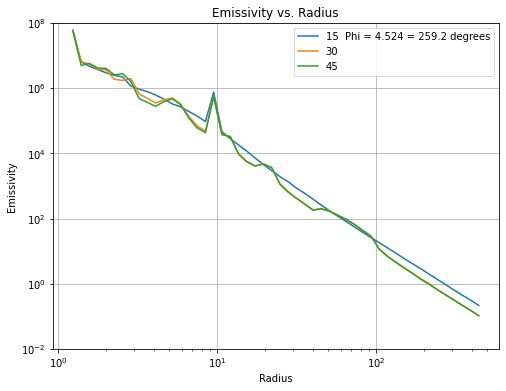

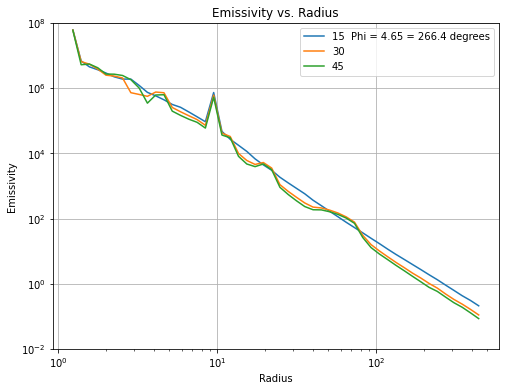

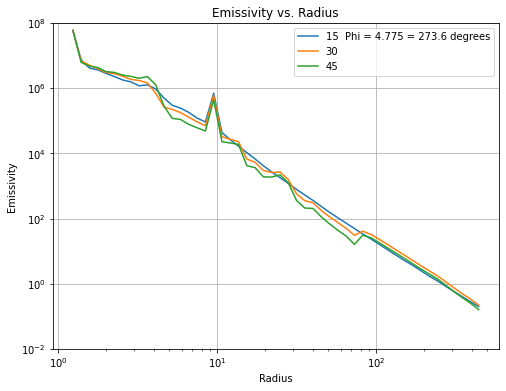

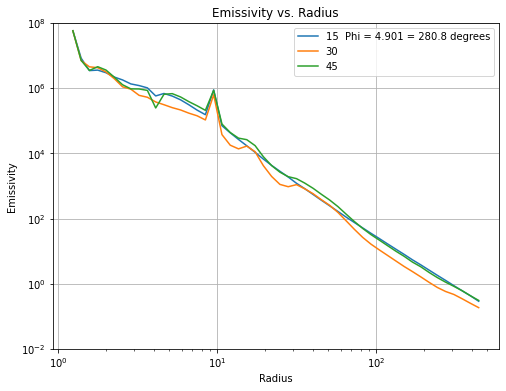

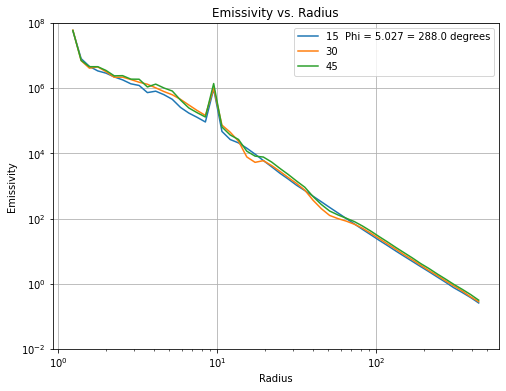

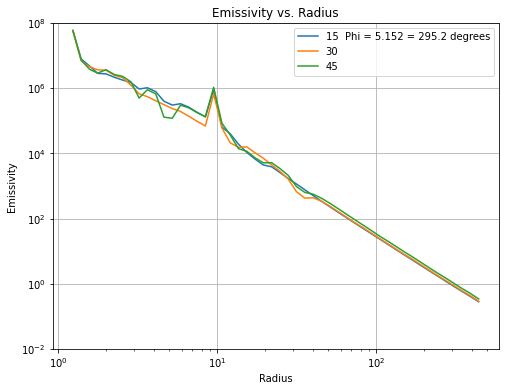

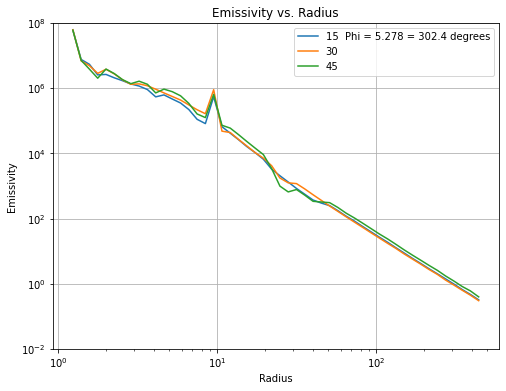

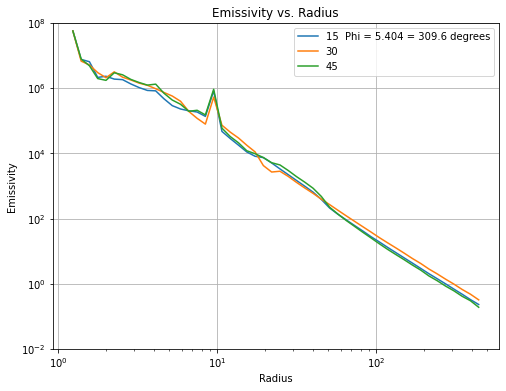

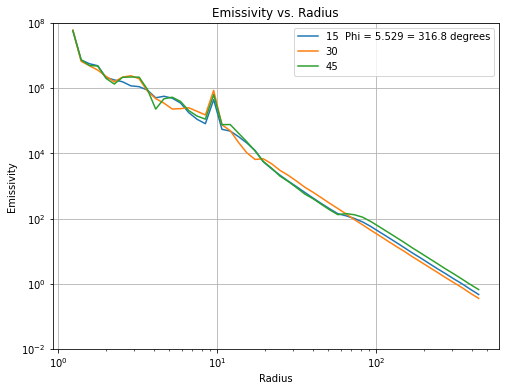

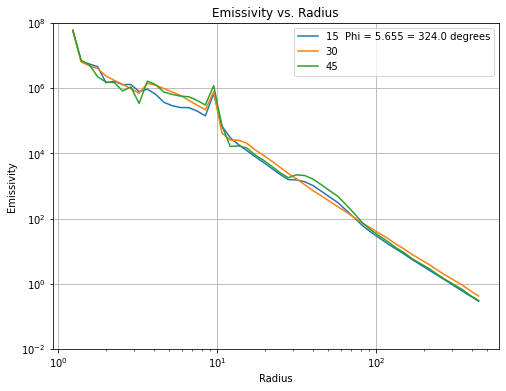

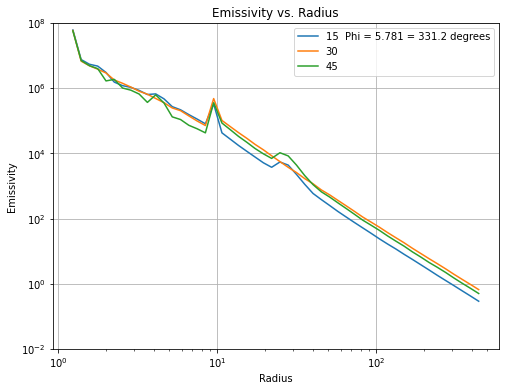

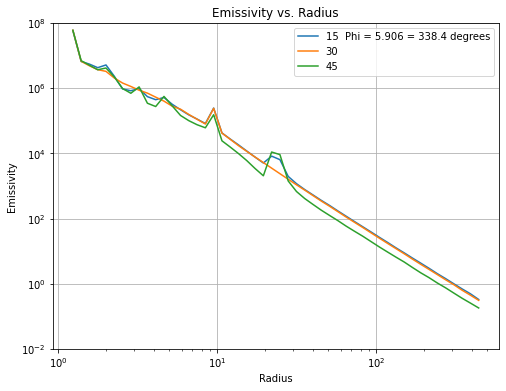

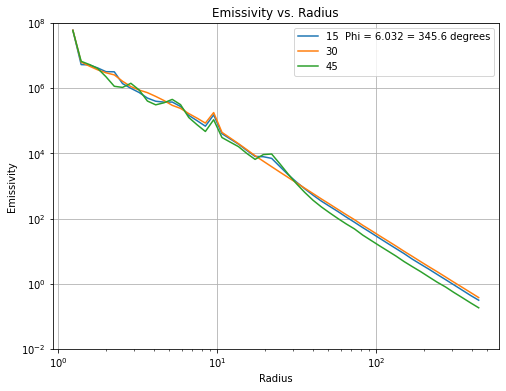

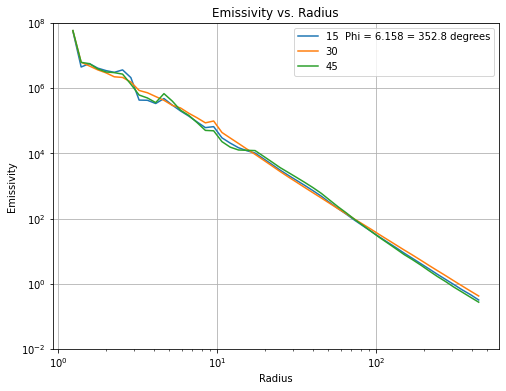

In [20]:
# radius = radius[0].reshape(50,50)
# phi = phi[0].reshape(50,50) 
# emissivity = emissivity.reshape(50, 50)

for i in range(50):
    plt.figure(figsize=(8, 6))
    plt.plot(radius_warped_5_10_15[:, i], emissivity_warped_5_10_15[:, i], label = '15 '+ ' Phi = ' + str(np.round(phi_warped_5_10_15[0][i], 3)) + ' = ' + str(np.round(np.rad2deg(phi_warped_5_10_15[0][i]), 3)) + ' degrees')
    plt.plot(radius_warped_5_10_30[:, i], emissivity_warped_5_10_30[:, i], label = '30')
    plt.plot(radius_warped_5_10_45[:, i], emissivity_warped_5_10_45[:, i], label = '45')


    plt.xlabel('Radius')
    plt.ylabel('Emissivity')
    plt.title('Emissivity vs. Radius')
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(1e-2, 1e8)
    plt.legend()

    plt.grid(True)

    plt.show()

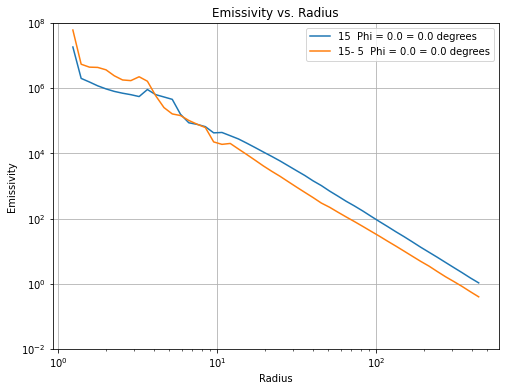

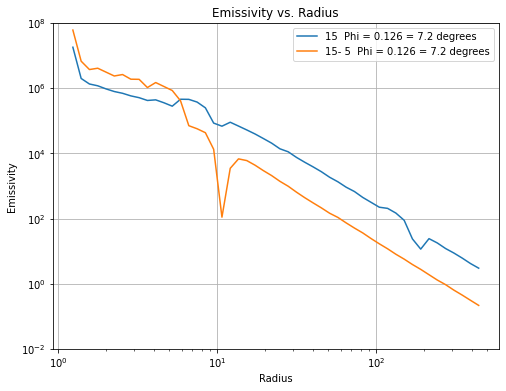

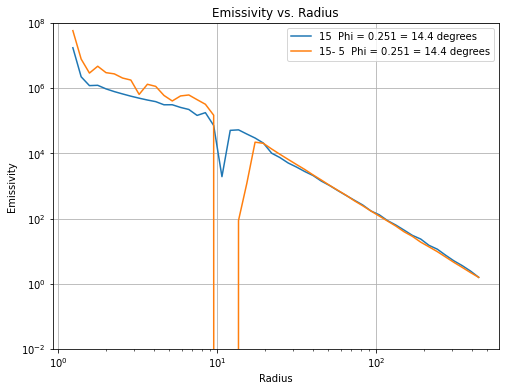

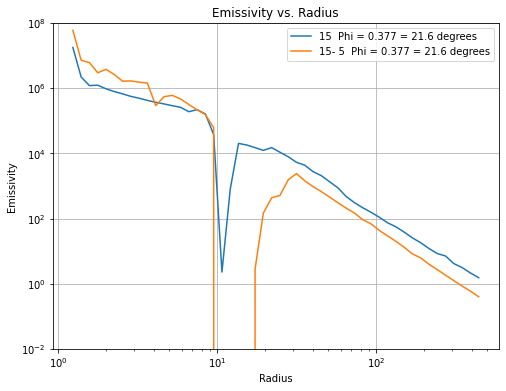

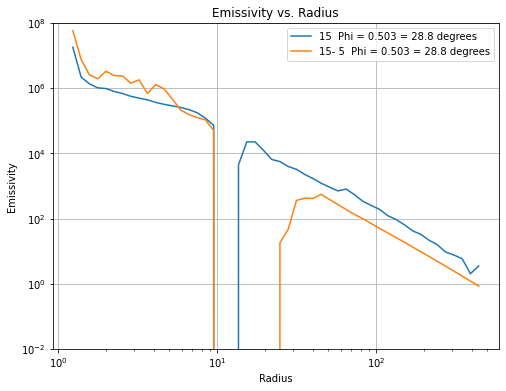

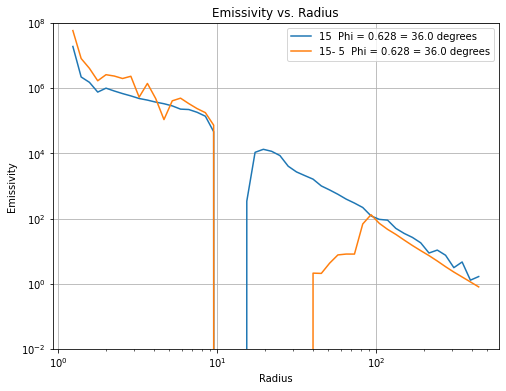

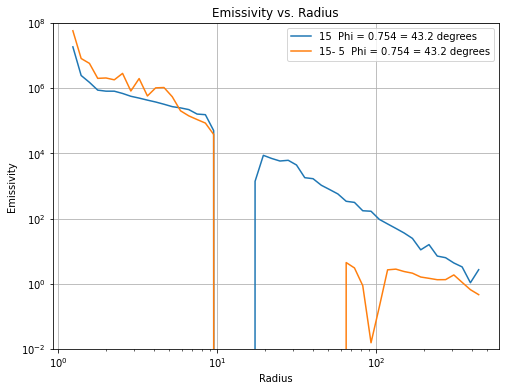

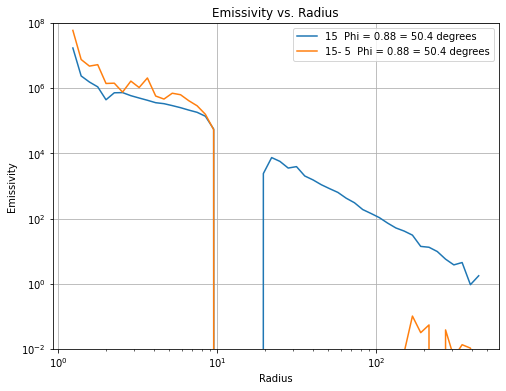

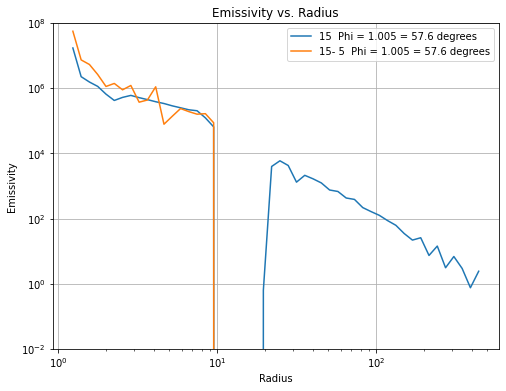

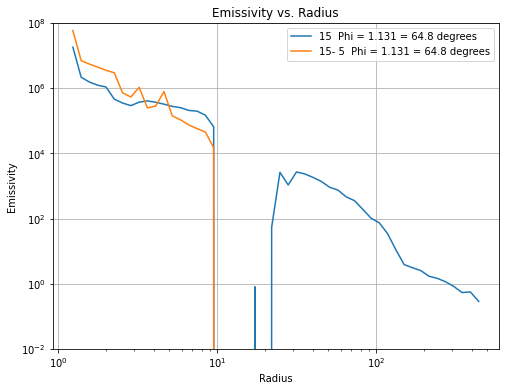

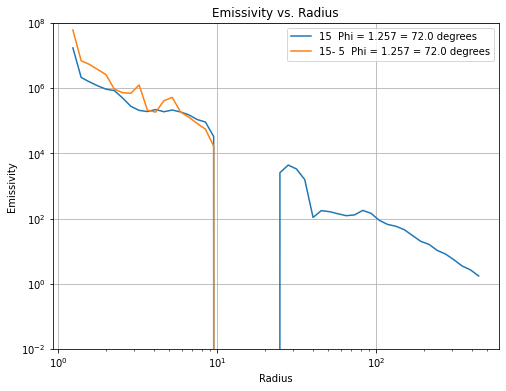

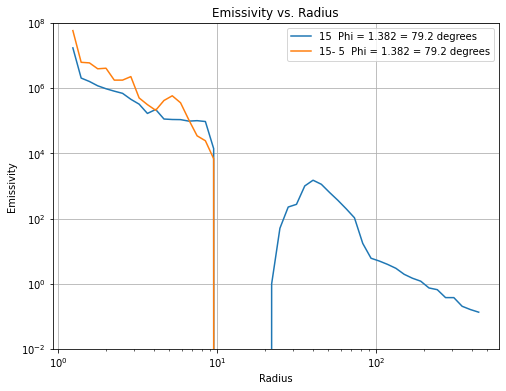

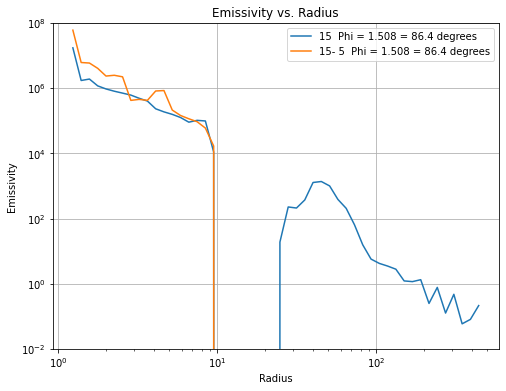

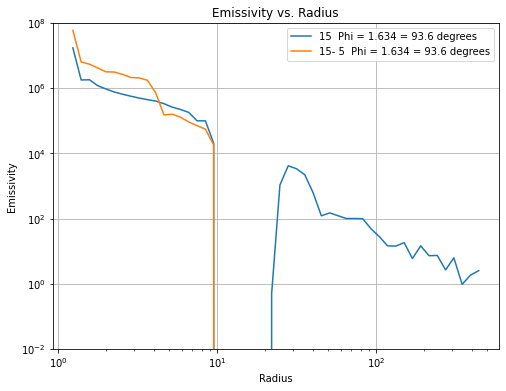

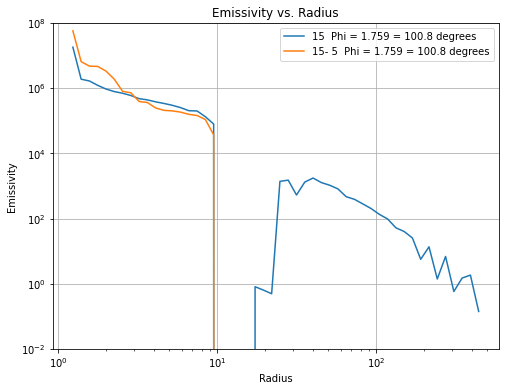

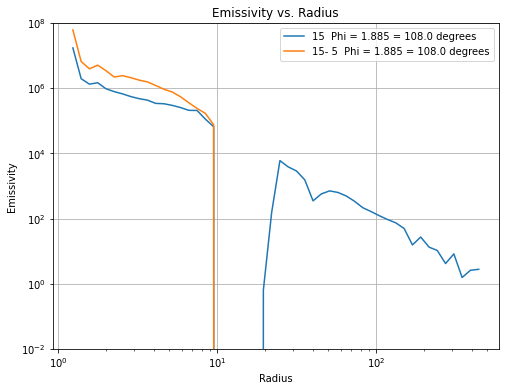

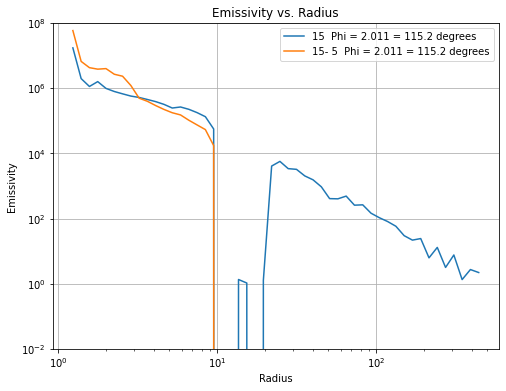

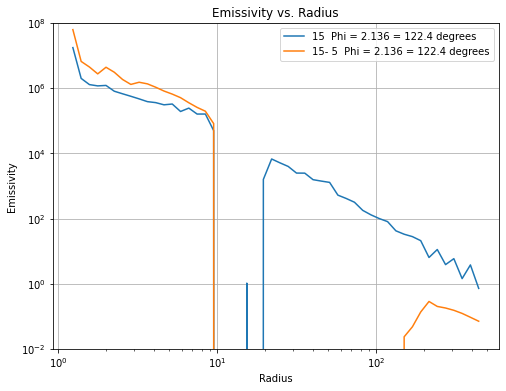

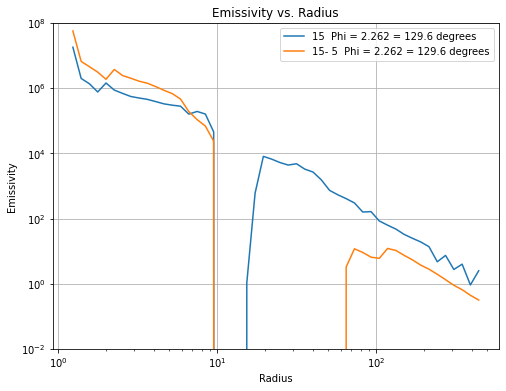

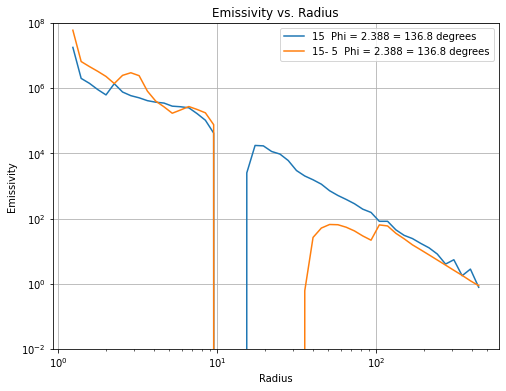

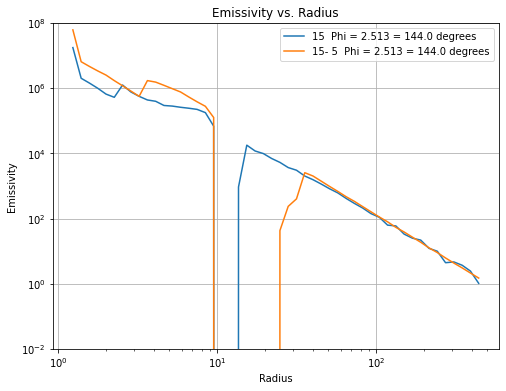

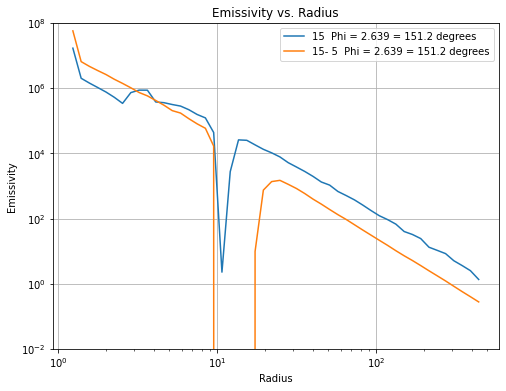

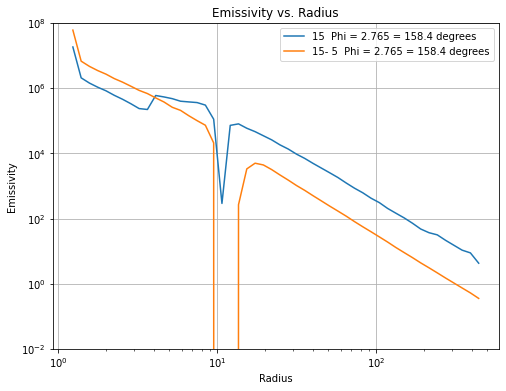

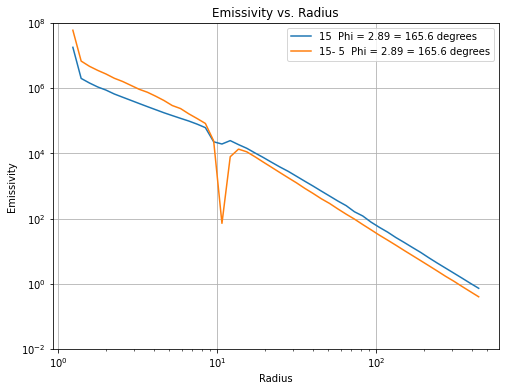

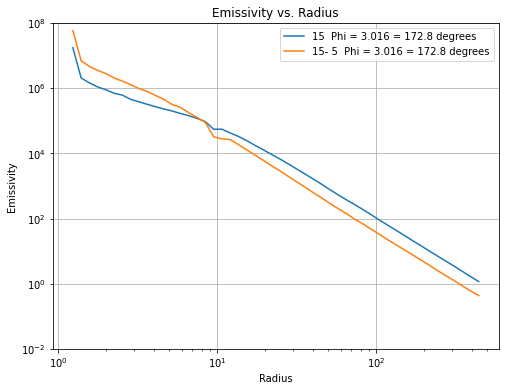

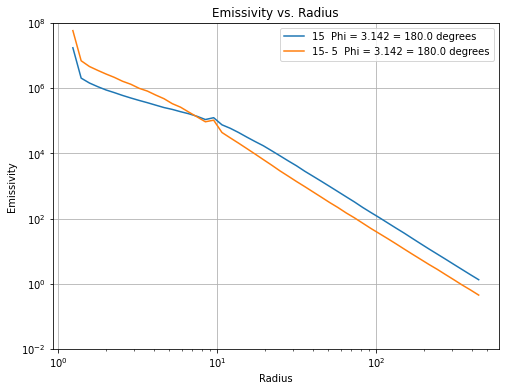

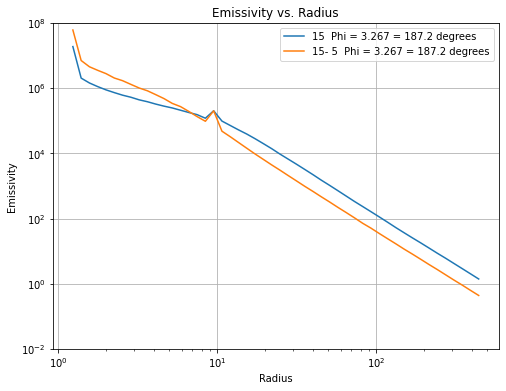

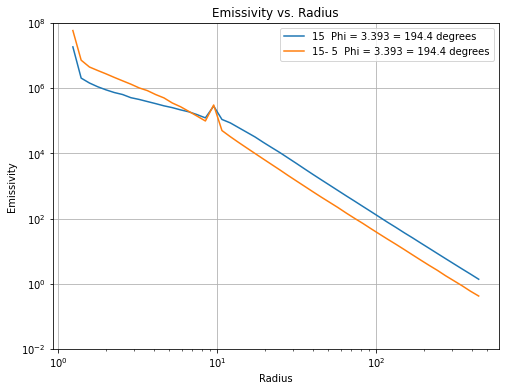

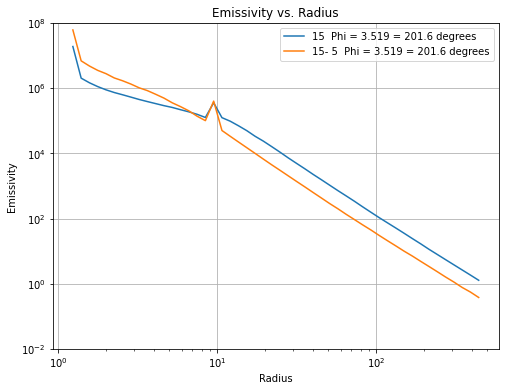

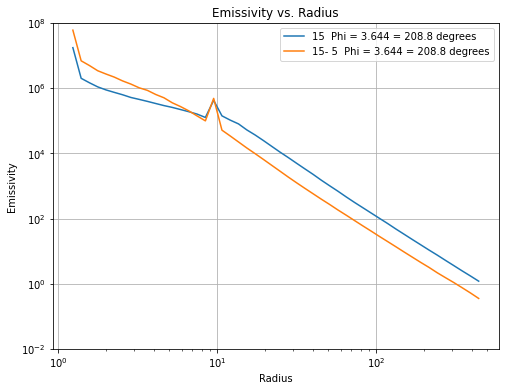

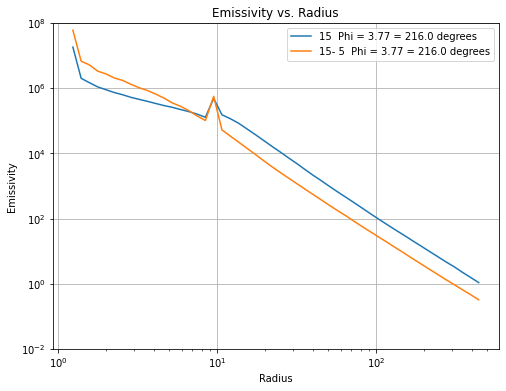

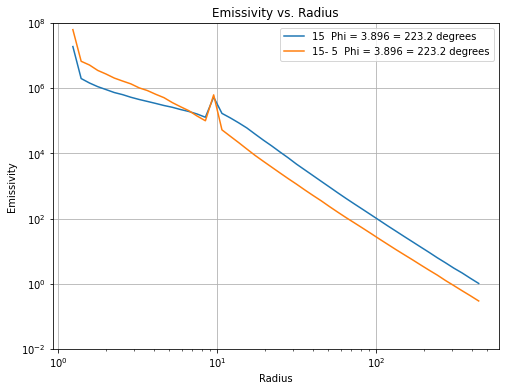

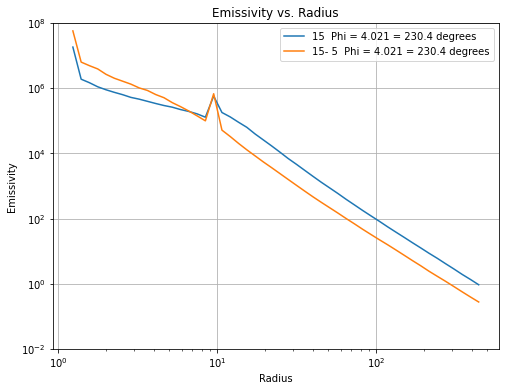

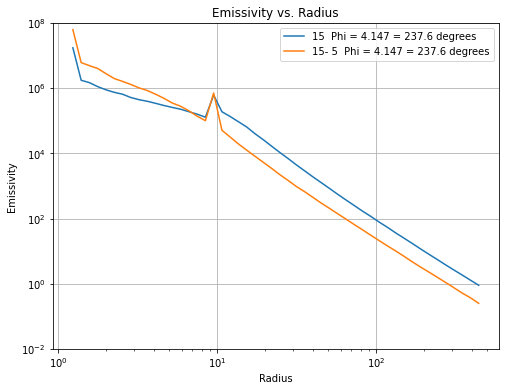

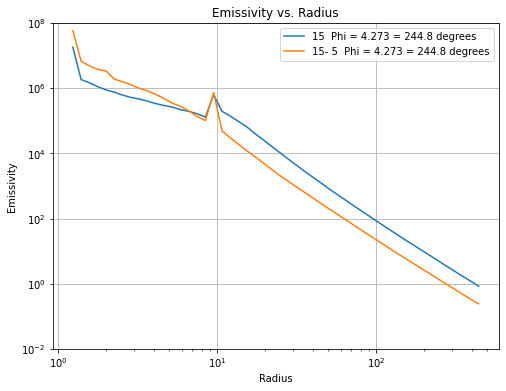

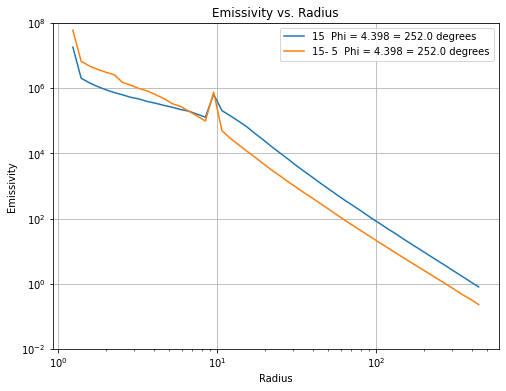

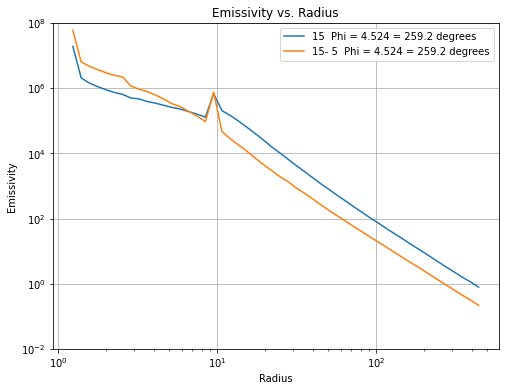

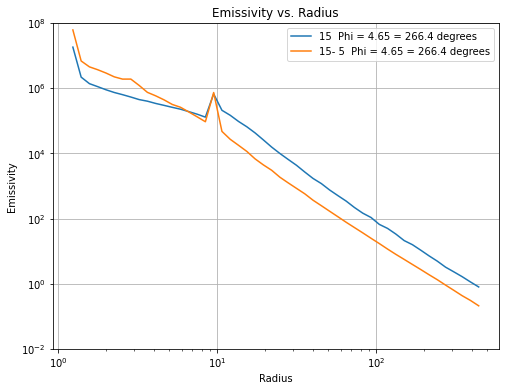

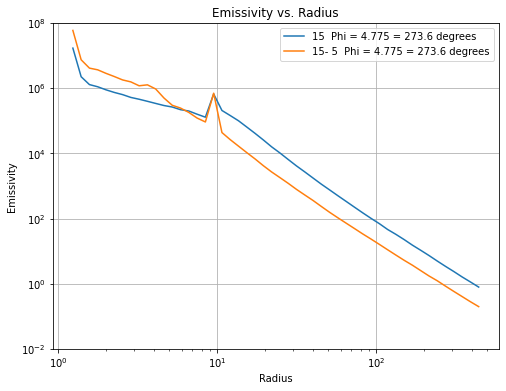

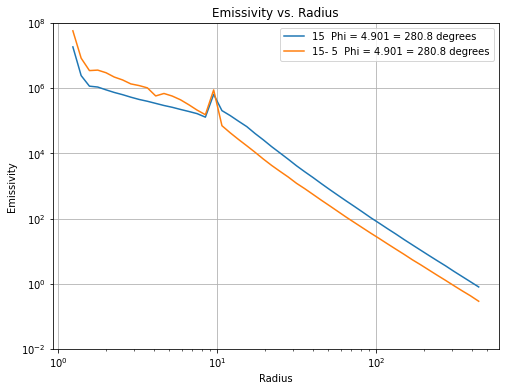

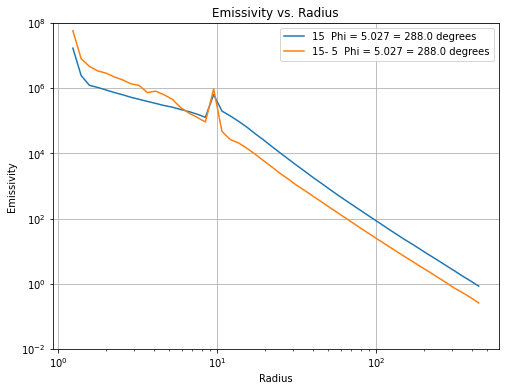

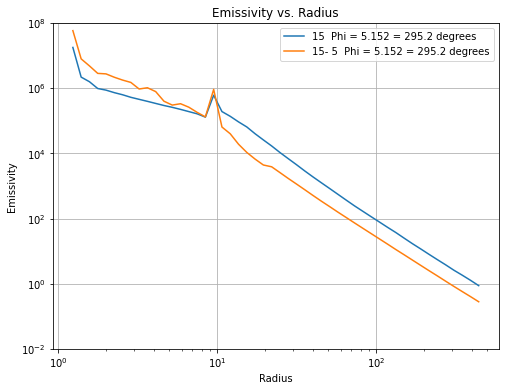

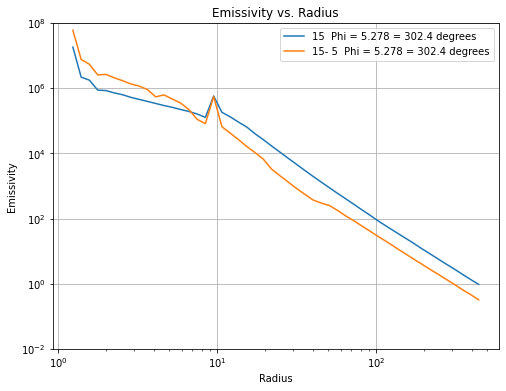

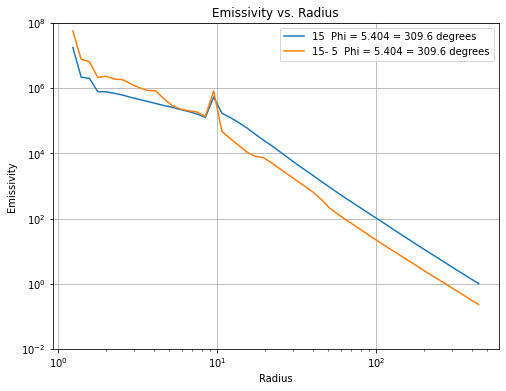

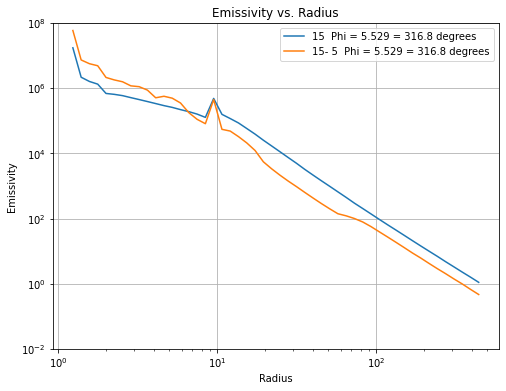

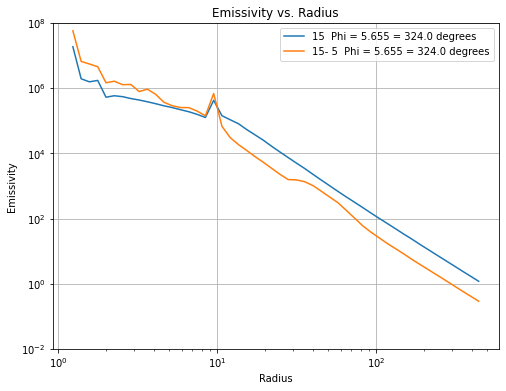

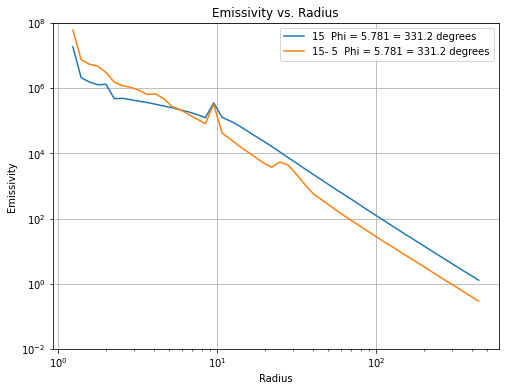

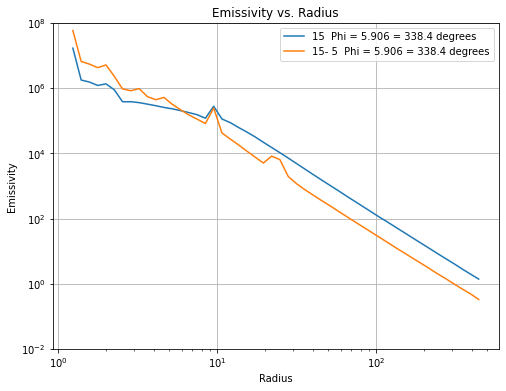

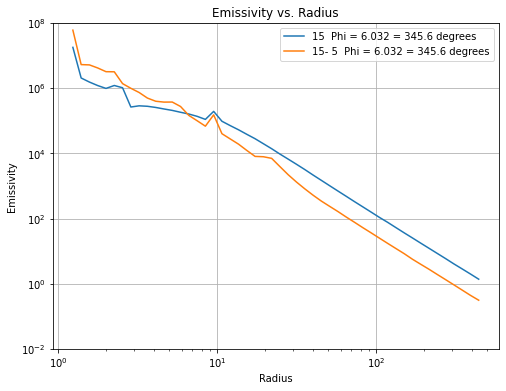

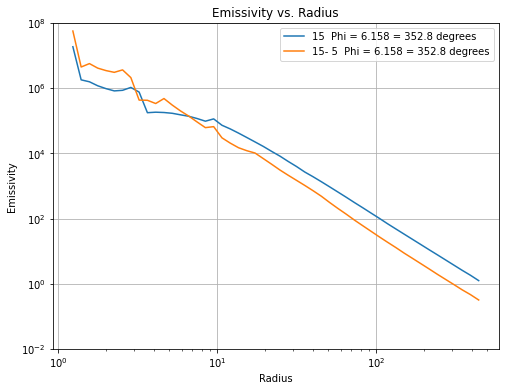

In [24]:
for i in range(50):
    plt.figure(figsize=(8, 6))
    plt.plot(radius_warped_10_10_15[:, i], emissivity_warped_10_10_15[:, i], label = '15 '+ ' Phi = ' + str(np.round(phi_warped_5_10_15[0][i], 3)) + ' = ' + str(np.round(np.rad2deg(phi_warped_5_10_15[0][i]), 3)) + ' degrees')
    plt.plot(radius_warped_5_10_15[:, i], emissivity_warped_5_10_15[:, i], label = '15- 5 '+ ' Phi = ' + str(np.round(phi_warped_5_10_15[0][i], 3)) + ' = ' + str(np.round(np.rad2deg(phi_warped_5_10_15[0][i]), 3)) + ' degrees')
    #plt.plot(radius_warped_10_10_30[:, i], emissivity_warped_10_10_30[:, i], label = '30')
    #plt.plot(radius_warped_10_10_45[:, i], emissivity_warped_10_10_45[:, i], label = '45')


    plt.xlabel('Radius')
    plt.ylabel('Emissivity')
    plt.title('Emissivity vs. Radius')
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(1e-2, 1e8)
    plt.legend()

    plt.grid(True)

    plt.show()